In [ ]:
pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
#calling libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy.ma.core import ceil
from sklearn import svm, datasets, metrics
from sklearn.metrics import precision_score
from sklearn.inspection import DecisionBoundaryDisplay


##loading the data (iris)

In [43]:
df = datasets.load_iris()
# preprocessing
data = ( np.zeros((3, len(df.data))) ).T
data[:,0:2] = df.data[:, 2:]
data[:,2] = df.target
np.random.shuffle(data)
# partition to train and test
X_trn = data[0:int(ceil(len(data)*0.8)),0:2]
Y_trn = data[0:int(ceil(len(data)*0.8)),2]
X_tst = data[int(ceil(len(data)*0.8) + 1):len(data),0:2]
Y_tst = data[int(ceil(len(data)*0.8) + 1):len(data),2]

##6-a


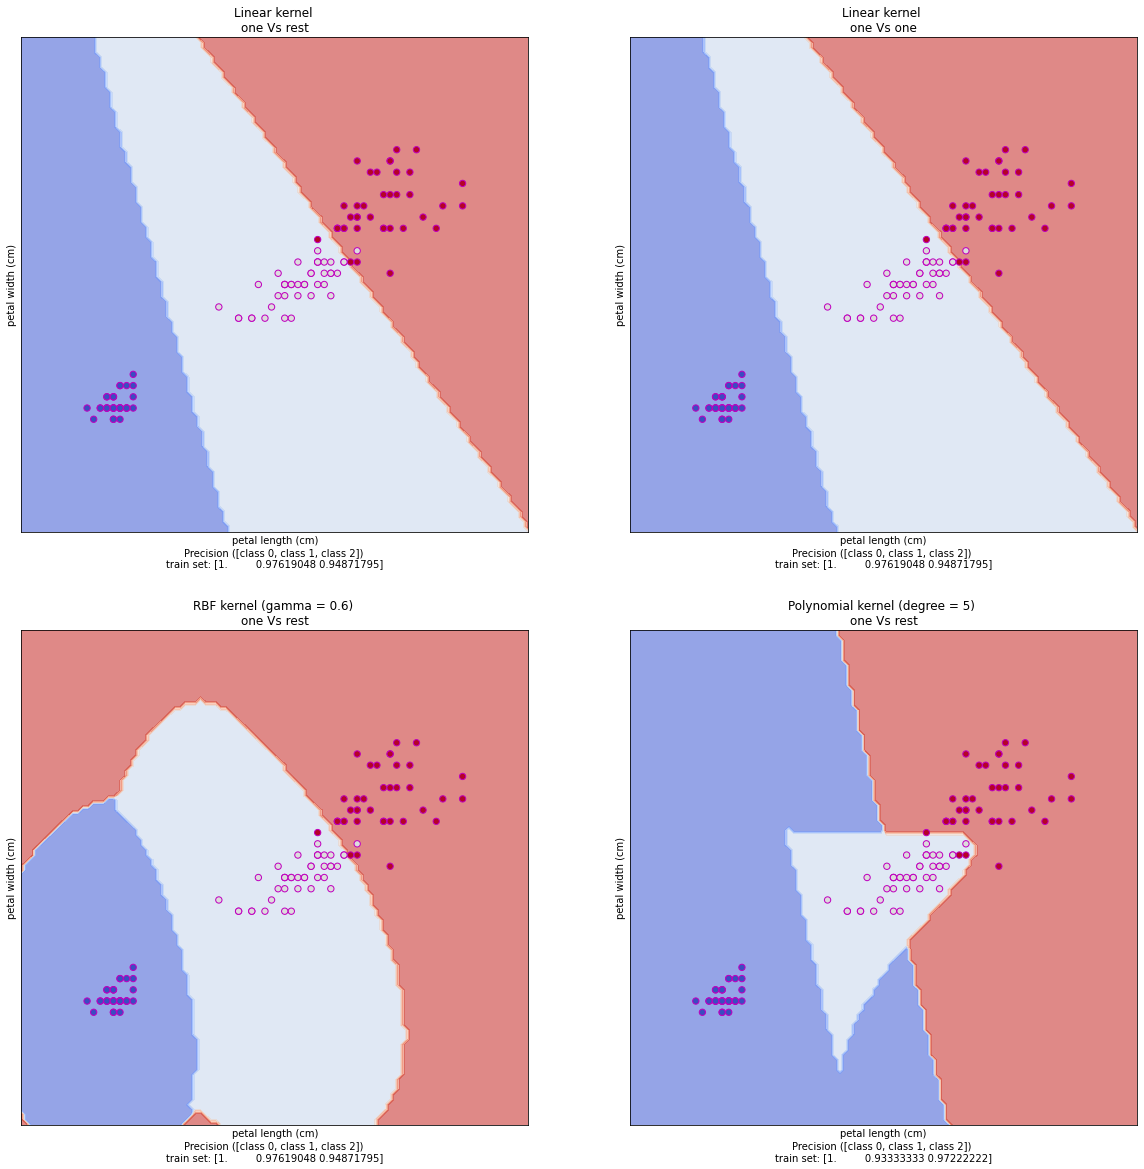

In [53]:
C = 1.0  # Soft margin SVM  parameter
model = (svm.SVC(kernel="linear", C=C, decision_function_shape='ovr'),svm.SVC(kernel="linear", C=C, decision_function_shape='ovo'), svm.SVC(kernel="rbf", gamma=0.6, C=C,decision_function_shape='ovr'), svm.SVC(kernel="poly", degree=5, gamma="auto", C=C, decision_function_shape='ovr'))
model = (clf.fit(X_trn, Y_trn) for clf in model)
# naming each graph
title = ("Linear kernel \none Vs rest", "Linear kernel \none Vs one", "RBF kernel (gamma = 0.6) \none Vs rest", "Polynomial kernel (degree = 5) \none Vs rest",
)
result = -1*np.ones((4, len(Y_tst)))
# 2*2 gigure for graph
fig, x = plt.subplots(2, 2, figsize=(20,20))

i = 0
for clf, title, ax in zip(model, title, x.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(clf, X_trn, response_method="predict", cmap="coolwarm", alpha=0.6, ax=ax, xlabel=df.feature_names[2]+"\n" + "Precision ([class 0, class 1, class 2]) \n" + "train set: " + str(precision_score(Y_trn,clf.predict(X_trn), average=None)), ylabel=df.feature_names[3],)
    result[i] = clf.predict(X_tst)
    i += 1
    ax.scatter(X_trn[:, 0], X_trn[:, 1], c=Y_trn, cmap="coolwarm", s=40, edgecolors="m")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

##6-part b


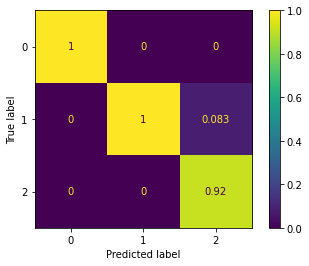

Precision ([class 0, class 1, class 2]) 
test set: [1.         1.         0.91666667]



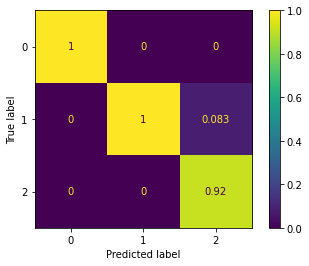

Precision ([class 0, class 1, class 2]) 
test set: [1.         1.         0.91666667]



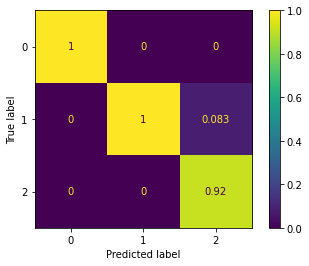

Precision ([class 0, class 1, class 2]) 
test set: [1.         1.         0.91666667]



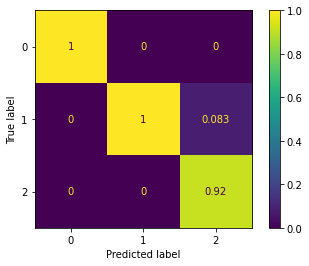

Precision ([class 0, class 1, class 2]) 
test set: [1.         1.         0.91666667]



In [56]:
for p in result:
  cf_matrix = metrics.confusion_matrix(Y_tst, p, normalize='pred')
  cf_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf_matrix, )
  cf_display.plot()
  plt.show()
  print("Precision ([class 0, class 1, class 2]) \n" +  "test set: " + str(precision_score(Y_tst,p, average=None)) + "\n",)